<br><br>
# <strong>Tensor Flow Deep Learning
<strong>Unsupervised Learning

<strong>Chapter 7 : 합성곱 신경망 (Convolution Neural Network)</strong>

<strong>RBM(Restricted Boltzmann Machine)<strong>

http://scikit-learn.org/stable/auto_examples/neural_networks/plot_rbm_logistic_classification.html

<br>
## <strong>1 AutoEncoder 개념
<strong>입력값과 출력값이 동일한 신경망</strong>으로, 가운데 Node의 갯수가 입력보다 적게 설계되어

입력데이터를 압축 후 복원함으로써 <strong>노이즈를 제거하는데 효과적</strong>으로 알려져 있다
1. 변이형 오토인코더 (Variational AutoEncoder)
1. 잡음제거 오토인코더 (Denoising AutoEncoder) 
1. 기타 다양한 오토인코더로 구성
1. 실무에선 <strong>RBM(Restricted Boltzmann Machine)</strong>을 대신 활용하기도 한다
1. <strong>오토인코더</strong>는 피처를 축소, <strong>RBM은 확률분포</strong>에 기반하여 visible 변수, hidden 변수간 상호작용을 파악
1. http://khanrc.tistory.com/entry/Autoencoder-vs-RBM-vs-CNN

<img src="http://fastforwardlabs.github.io/blog-images/miriam/imgs_code/vae.4.png" align="left" width='400'>

<br>
## <strong>2 AutoEncoder 구현
<strong>MNIST 데이터를 활용

(참고) Optimizers 최적화 알고리즘
1. SGD with Momentum
1. RMS propagation   &nbsp;&nbsp;&nbsp;<--  using in codes
1. Adagrad
1. Adadelta
1. Adam

In [1]:
# 대표적인 비지도(Unsupervised) 학습 방법인 Autoencoder 를 구현해봅니다.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./data/mnist/", one_hot=True)

/home/markbaum/Python/python36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Extracting ./data/mnist/train-images-idx3-ubyte.gz
Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz


In [2]:
# 1. 파라미터의 설정
learning_rate = 0.01  # Activation Function의 파라미터
training_epoch = 20   # 전체 데이터를 학습하는 총 횟수
batch_size = 100      # 1번 학습시 호출할 이미지 데이터 숫자 (100개씩 랜덤추출)

# 1) 신경망 레이어 구성 옵션
n_hidden = 256        # 히든 레이어의 뉴런 갯수
n_input  = 28*28      # 입력값 크기 - 이미지 픽셀수

In [3]:
# 2. 신경망 모델 구성
# 1) 입력값을 Y로 사용하므로, 별도 Y를 설정하지 않는다
X = tf.placeholder(tf.float32, [None, n_input])

# 2) 인코더 레이어와 디코더 레이어의 가중치와 편향 변수를 설정 
# input -> encode -> decode -> output
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))
# cf) sigmoid 함수를 이용해 신경망 레이어를 구성시 : sigmoid(X * W + b)

In [4]:
# 3. 모델을 정의한다
# 1) 인코더 레이어 구성
# encode는 입력값보다 작은값으로 정보를 압축, decode 출력풋은 입력과 동일한 크기로 설정
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))

In [5]:
# 2) 디코더 레이어 구성 : 디코더가 최종 모델이 된다
decoder = tf.nn.sigmoid(
                tf.add(tf.matmul(encoder, W_decode), b_decode))

# 3) 손실함수 정의
# 디코더는 인풋과 최대한 같은 결과를 내야 하므로, 디코딩한 결과를 평가하기 위해
# 입력 값인 X 를 실측 결과 값으로하여 decoder 와의 차이를 손실함수를 정의한다
cost = tf.reduce_mean(tf.pow(X - decoder, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [6]:
# 4. 신경망 모델 학습
# 1) 모델학습 초기화
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
total_batch = int(mnist.train.num_examples/batch_size)
# 2) 모델의 훈련
for epoch in range(training_epoch):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        total_cost += cost_val
    if epoch % 4 == 0:
        print('Epoch:', '%04d'%(epoch+1),
              'Avg.cost =', '{:.4f}'.format(total_cost / total_batch))
print('최적화 완료!')

Epoch: 0001 Avg.cost = 0.1951
Epoch: 0005 Avg.cost = 0.0385
Epoch: 0009 Avg.cost = 0.0297
Epoch: 0013 Avg.cost = 0.0256
Epoch: 0017 Avg.cost = 0.0246
최적화 완료!


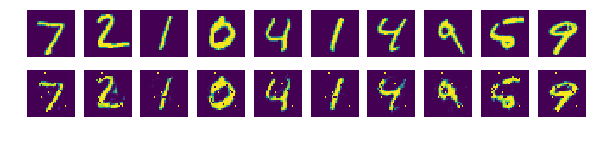

In [7]:
# 5. 모델의 성능평가
sample_size = 10
samples = sess.run(decoder,
                   feed_dict = {X: mnist.test.images[ :sample_size]})
fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))
for i in range(sample_size):
    # 원본 이미지를 출력
    ax[0][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    # AutoEncoder로 생성한 이미지를 출력
    ax[1][i].set_axis_off()
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))
plt.show()

<br><br>
# <strong>Tensor Flow Deep Learning
<strong>Unsupervised Learning

<strong>Chapter 8 : GAN (Generative Adversarial Network)</strong>

대립하는 두 신경망을 경쟁시킴으로써 결과물 생성하는 학습모듈
1. Discriminator(구분자)에게 이미지가 진짜임을 판단하게 한다
1. Generator(생성자)를 통해 노이즈로 부터 임의 이미지를 만들고, 이를 진짜 이미지여부를 판단한다
1. <strong>생성자가 가짜 이미지</strong>를 만들고, <strong>구분자가 이를 구분하는 훈련</strong>을 통해서 진짜 이미지 구별능력을 향상시킨다

<strong>ex) 위조지폐 범죄자와, 경찰을 경쟁시켜 완벽한 위조지폐/ 원본화폐를 찾는 학습모듈을 생성

<img src="https://oshearesearch.com/wp-content/uploads/2016/07/mnist_gan.png" align='left' width='600'>

<br>
## <strong>1 GNA Deep Learning
https://arxiv.org/abs/1406.2661

Generator(생성자)가 실제와 상당히 비슷한 이미지를 생성하는 능력을 키운다
1. 이미지에서 고흐풍의 <strong>이미지를 재현</strong>
1. 테두리만 있는 <strong>이미지를 자동채색</strong>
1. <strong>모자이크 이미지를 복원</strong> 등에서 탁월한 성능을 나타낸다
1. 기타 <strong>자연어 문장 생성</strong>의 연구에서도 활발한 성능을 나타낸다

<br>
## <strong>2 GNA 기본 모델의 구현
<strong>Unsupervised 학습인 Generative Adversarial Network (GAN) 2016 을 구현한다

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./data/mnist/", one_hot=True)

Extracting ./data/mnist/train-images-idx3-ubyte.gz
Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz


In [9]:
# 1. 파라미터 설정
# 1) 옵션 설정
total_epoch = 100
batch_size = 100
learning_rate = 0.0002

# 2) 신경망 레이어 구성 옵션
n_hidden = 256
n_input = 28 * 28
n_noise = 128  # 생성기의 입력값으로 사용할 노이즈의 크기

In [10]:
# 2. 신경망의 파라미터를 설정
# 1) 입력/ 출력부분 설정
# GAN 도 Unsupervised 학습이므로 Y 를 사용하지 않는다
X = tf.placeholder(tf.float32, [None, n_input])
# 대신 노이즈 Z를 추가 입력값으로 사용
Z = tf.placeholder(tf.float32, [None, n_noise])

# 2) Generator : 생성기 신경망의 변수를 설정
G_W1 = tf.Variable(tf.random_normal([n_noise, n_hidden], stddev=0.01)) # 입력부분
G_b1 = tf.Variable(tf.zeros([n_hidden]))
G_W2 = tf.Variable(tf.random_normal([n_hidden, n_input], stddev=0.01))
G_b2 = tf.Variable(tf.zeros([n_input]))

# 3) Discriminator : 판별기 신경망에 사용하는 변수를 설정
D_W1 = tf.Variable(tf.random_normal([n_input, n_hidden], stddev=0.01))
D_b1 = tf.Variable(tf.zeros([n_hidden]))
# 판별기의 최종 결과값이 진짜와 얼마나 가까운지를 판단 : Scalar
D_W2 = tf.Variable(tf.random_normal([n_hidden, 1], stddev=0.01)) # 출력부분
D_b2 = tf.Variable(tf.zeros([1]))

In [11]:
# 3. 신경망의 모델을 정의한다
# 생성기(G) 신경망 정의
def generator(noise_z):
    hidden = tf.nn.relu(tf.matmul(noise_z, G_W1) + G_b1)
    output = tf.nn.sigmoid(tf.matmul(hidden, G_W2) + G_b2)
    return output

# 판별기(D) 신경망 정의
def discriminator(inputs):
    hidden = tf.nn.relu(tf.matmul(inputs, D_W1) + D_b1)
    output = tf.nn.sigmoid(tf.matmul(hidden, D_W2) + D_b2)
    return output

# 랜덤한 노이즈(Z)를 생성
def get_noise(batch_size, n_noise):
    return np.random.normal(size=(batch_size, n_noise))

In [12]:
# 4. 노이즈를 이용해 랜덤한 이미지를 생성
G = generator(Z)
# 노이즈를 이용해 생성한 이미지가 진짜 이미지인지 판별
D_gene = discriminator(G)
# 진짜 이미지를 이용해 판별한 결과를 출력
D_real = discriminator(X)

In [13]:
# 5. 이미지 판별기/ 생성기의 코스트 함수
# GAN 모델의 최적화는 loss_G, loss_D 를 최대로 갖는 모델을 설계한다
# 하지만 loss_D와 loss_G는 경쟁관계로 서로 반대로 움직인다
# 논문의 수식에서는 loss_D 를 최대화하기 위해, D_gene 를 최소화 한다
# tf.log(D_real) : 판별기에 진짜 이미지를 넣었을 때 최대값을 출력한다
# tf.log(1 - D_gene) : 가짜 이미지를 넣었을 때에도 최대값을 출력한다 

In [14]:
# 이것은 판별기는 생성기가 만들어낸 이미지가 가짜라고 판단하도록 판별기 신경망을 학습시킵니다.
loss_D = tf.reduce_mean(tf.log(D_real) + tf.log(1 - D_gene))
# loss_G 를 최대로 하기 위해서는, D_gene 도 같이 최대가 되어야 한다
# cf) 논문에서는 loss_D 와 같은 수식으로 최소화 하는 생성기를 찾는다
loss_G = tf.reduce_mean(tf.log(D_gene))

In [15]:
# loss_D 는 판별기 신경망에 사용되는 변수를 사용하고,
# loss_G 는 생성기 신경망에 사용되는 변수만 사용하여 최적화를 합니다.
D_var_list = [D_W1, D_b1, D_W2, D_b2]
G_var_list = [G_W1, G_b1, G_W2, G_b2]

# GAN 논문의 수식에 따르면 loss 를 극대화 해야하지만, minimize 하는 최적화 함수를 사용하기 때문에
# 최적화 하려는 loss_D 와 loss_G 에 음수 부호를 붙여줍니다.
train_D = tf.train.AdamOptimizer(learning_rate).minimize(-loss_D,
                                                         var_list=D_var_list)
train_G = tf.train.AdamOptimizer(learning_rate).minimize(-loss_G,
                                                         var_list=G_var_list)

In [ ]:
# 6. 신경망 모델의 학습
sess = tf.Session()
sess.run(tf.global_variables_initializer())
total_batch = int(mnist.train.num_examples/batch_size)
loss_val_D, loss_val_G = 0, 0

In [ ]:
for epoch in range(total_epoch):
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)
        # 판별기와 생성기 신경망을 각각 학습시킵니다.
        _, loss_val_D = sess.run([train_D, loss_D], feed_dict={X: batch_xs, Z: noise})
        _, loss_val_G = sess.run([train_G, loss_G], feed_dict={Z: noise})
    print('Epoch:', '%04d' % epoch,
          'D loss: {:.4}'.format(loss_val_D),
          'G loss: {:.4}'.format(loss_val_G))

    # 7. 학습이 되어가는 모습을 보기 위해 주기적으로 이미지를 생성하여 저장
    if epoch == 0 or (epoch + 1) % 10 == 0:
        sample_size = 10
        noise = get_noise(sample_size, n_noise)
        samples = sess.run(G, feed_dict={Z: noise})
        fig, ax = plt.subplots(1, sample_size, figsize=(sample_size, 1))
        for i in range(sample_size):
            ax[i].set_axis_off()
            ax[i].imshow(np.reshape(samples[i], (28, 28)))
        # samples 폴더에, 이미지 생성결과를 저장한다
        plt.savefig('.data/gan_sample/{}.png'.format(str(epoch).zfill(3)), bbox_inches='tight')
        plt.close(fig)
print('최적화 완료!')

Epoch: 0000 D loss: -0.5188 G loss: -2.18
Epoch: 0001 D loss: -0.113 G loss: -3.31
Epoch: 0002 D loss: -0.5994 G loss: -1.543
Epoch: 0003 D loss: -0.3491 G loss: -2.151
Epoch: 0004 D loss: -0.2998 G loss: -2.416
Epoch: 0005 D loss: -0.2007 G loss: -2.722
Epoch: 0006 D loss: -0.2776 G loss: -2.632
Epoch: 0007 D loss: -0.3037 G loss: -2.38
Epoch: 0008 D loss: -0.3299 G loss: -2.453
Epoch: 0009 D loss: -0.3954 G loss: -2.461
Epoch: 0010 D loss: -0.3446 G loss: -2.272
Epoch: 0011 D loss: -0.4267 G loss: -2.403
Epoch: 0012 D loss: -0.4867 G loss: -2.182
Epoch: 0013 D loss: -0.3464 G loss: -2.831
Epoch: 0014 D loss: -0.3517 G loss: -2.429
Epoch: 0015 D loss: -0.4713 G loss: -2.264
Epoch: 0016 D loss: -0.5212 G loss: -2.445
Epoch: 0017 D loss: -0.4488 G loss: -2.447
Epoch: 0018 D loss: -0.5065 G loss: -2.391
Epoch: 0019 D loss: -0.4624 G loss: -2.243
Epoch: 0020 D loss: -0.5645 G loss: -2.121
Epoch: 0021 D loss: -0.4033 G loss: -2.503
Epoch: 0022 D loss: -0.5633 G loss: -2.863
Epoch: 0023 D l

<br>
## <strong>3 원하는 숫자의 이미지 생성모델 구현
<strong>특정한 숫자 이미지를 생성하는 모델을 설계한다

In [ ]:
# GAN 모델을 이용해 단순히 랜덤한 숫자를 생성하는 아닌,
# 원하는 손글씨 숫자를 생성하는 모델을 만들어봅니다.
# 이런 방식으로 흑백 사진을 컬러로 만든다든가, 또는 선화를 채색한다든가 하는 응용이 가능합니다.
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./data/mnist/", one_hot=True)

In [ ]:
# 1. 파라미터 설정
total_epoch = 100
batch_size = 100
n_hidden = 256
n_input = 28 * 28
n_noise = 128
n_class = 10

In [ ]:
# 2. 신경망 모델 구성
X = tf.placeholder(tf.float32, [None, n_input])
# 노이즈와 실제 이미지에, 그에 해당하는 숫자에 대한 정보를 넣어주기 위해 사용합니다.
Y = tf.placeholder(tf.float32, [None, n_class])
Z = tf.placeholder(tf.float32, [None, n_noise])

In [ ]:
def generator(noise, labels):
    with tf.variable_scope('generator'):
        # noise 값에 labels 정보를 추가합니다.
        inputs = tf.concat([noise, labels], 1)
        # TensorFlow 에서 제공하는 유틸리티 함수를 이용해 신경망을 매우 간단하게 구성할 수 있습니다.
        hidden = tf.layers.dense(inputs, n_hidden, activation = tf.nn.relu)
        output = tf.layers.dense(hidden, n_input, activation = tf.nn.sigmoid)
    return output

In [ ]:
def discriminator(inputs, labels, reuse = None):
    with tf.variable_scope('discriminator') as scope:
        # 노이즈에서 생성한 이미지와 실제 이미지를 판별하는 모델의 변수를 동일하게 하기 위해,
        # 이전에 사용되었던 변수를 재사용하도록 합니다.
        if reuse:
            scope.reuse_variables()
        inputs = tf.concat([inputs, labels], 1)
        hidden = tf.layers.dense(inputs, n_hidden, activation = tf.nn.relu)
        output = tf.layers.dense(hidden, 1, activation = None)
    return output

In [ ]:
def get_noise(batch_size, n_noise):
    return np.random.uniform(-1., 1., size=[batch_size, n_noise])

# 생성 모델과 판별 모델에 Y 즉, labels 정보를 추가하여
# labels 정보에 해당하는 이미지를 생성할 수 있도록 유도합니다.
G = generator(Z, Y)
D_real = discriminator(X, Y)
D_gene = discriminator(G, Y, True)

In [ ]:
# 손실함수는 다음을 참고하여 GAN 논문에 나온 방식과는 약간 다르게 작성하였습니다.
# http://bamos.github.io/2016/08/09/deep-completion/
# 진짜 이미지를 판별하는 D_real 값은 1에 가깝도록,
# 가짜 이미지를 판별하는 D_gene 값은 0에 가깝도록 하는 손실 함수입니다.
loss_D_real = tf.reduce_mean(
                    tf.nn.sigmoid_cross_entropy_with_logits(
                        logits=D_real, labels=tf.ones_like(D_real)))
loss_D_gene = tf.reduce_mean(
                    tf.nn.sigmoid_cross_entropy_with_logits(
                        logits=D_gene, labels=tf.zeros_like(D_gene)))
# loss_D_real 과 loss_D_gene 을 더한 뒤 이 값을 최소화 하도록 최적화합니다.
loss_D = loss_D_real + loss_D_gene
# 가짜 이미지를 진짜에 가깝게 만들도록 생성망을 학습시키기 위해, D_gene 을 최대한 1에 가깝도록 만드는 손실함수입니다.
loss_G = tf.reduce_mean(
                    tf.nn.sigmoid_cross_entropy_with_logits(
                        logits=D_gene, labels=tf.ones_like(D_gene)))

# TensorFlow 에서 제공하는 유틸리티 함수를 이용해
# discriminator 와 generator scope 에서 사용된 변수들을 쉽게 가져올 수 있습니다.
vars_D = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,
                           scope='discriminator')
vars_G = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,
                           scope='generator')

train_D = tf.train.AdamOptimizer().minimize(loss_D,
                                            var_list=vars_D)
train_G = tf.train.AdamOptimizer().minimize(loss_G,
                                            var_list=vars_G)

#########
# 신경망 모델 학습
######
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples/batch_size)
loss_val_D, loss_val_G = 0, 0

for epoch in range(total_epoch):
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)

        _, loss_val_D = sess.run([train_D, loss_D],
                                 feed_dict={X: batch_xs, Y: batch_ys, Z: noise})
        _, loss_val_G = sess.run([train_G, loss_G],
                                 feed_dict={Y: batch_ys, Z: noise})

    print('Epoch:', '%04d' % epoch,
          'D loss: {:.4}'.format(loss_val_D),
          'G loss: {:.4}'.format(loss_val_G))

    #########
    # 학습이 되어가는 모습을 보기 위해 주기적으로 레이블에 따른 이미지를 생성하여 저장
    ######
    if epoch == 0 or (epoch + 1) % 10 == 0:
        sample_size = 10
        noise = get_noise(sample_size, n_noise)
        samples = sess.run(G,
                           feed_dict={Y: mnist.test.labels[:sample_size],
                                      Z: noise})

        fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

        for i in range(sample_size):
            ax[0][i].set_axis_off()
            ax[1][i].set_axis_off()

            ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
            ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

        plt.savefig('samples2/{}.png'.format(str(epoch).zfill(3)), bbox_inches='tight')
        plt.close(fig)

print('최적화 완료!')